<a href="https://colab.research.google.com/github/serebris/LIS706_Wisconsin-Homicide/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading in the Data wisc_base.csv file


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the CSV file
wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/wisc_base.csv')

In [ ]:
wisc_base.head()

,County,Solved,Year,Month,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Firearm,Murder
0,Dane,1,2000,1,1,M,Black,1,M,Black,1,1
1,Milwaukee,1,2000,1,7,F,White,7,M,White,0,0
2,Milwaukee,1,2000,1,1,F,Black,2,M,Black,1,1
3,Milwaukee,1,2000,1,6,F,White,7,M,White,1,1
4,Milwaukee,1,2000,1,3,M,Black,2,M,Black,0,1


In [ ]:
wisc_base = wisc_base.drop(['Unnamed: 0'], axis=1)

In [ ]:
wisc_base.columns

Index(['County', 'Solved', 'Year', 'Month', 'VicAge', 'VicSex', 'VicRace',
       'OffAge', 'OffSex', 'OffRace', 'Firearm', 'Murder'],
      dtype='object')

<ipython-input-8-e74b02bfb600>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(wisc_base.corr())


<Axes: >

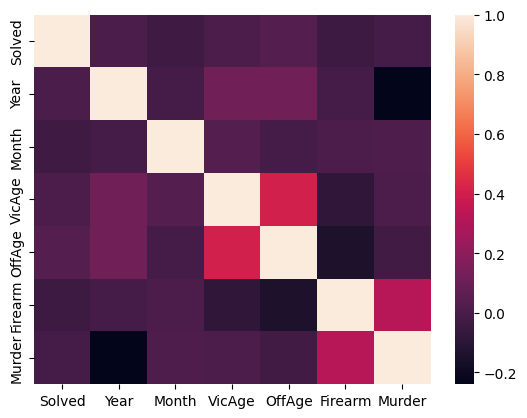

In [ ]:
# Correlation map
sn.heatmap(wisc_base.corr())

# Naive Bayes

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop irrelevant columns for the model (e.g., 'County', 'Year', 'Month', 'Murder')
wisc_base_model = wisc_base.drop(['Year', 'Month', 'Murder'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
wisc_base_model = pd.get_dummies(wisc_base_model, columns=['County', 'VicAge', 'VicSex', 'VicRace', 'OffAge', 'OffSex', 'OffRace'])

# Split the data into features (X) and target variable (y)
X_wisc_base = wisc_base_model.drop('Firearm', axis=1)
y_wisc_base = wisc_base_model['Firearm']

# Split the data into training and testing sets
X_train_wisc_base, X_test_wisc_base, y_train_wisc_base, y_test_wisc_base = train_test_split(
    X_wisc_base, y_wisc_base, test_size=0.2, random_state=42
)

# Initialize and fit Gaussian Naive Bayes model
naive_bayes_wisc_base = GaussianNB()
naive_bayes_wisc_base.fit(X_train_wisc_base, y_train_wisc_base)

# Predict 'Firearm' based on the features
predictions_nb_wisc_base = naive_bayes_wisc_base.predict(X_test_wisc_base)

# Calculate and print accuracy
accuracy_nb_wisc_base = accuracy_score(y_test_wisc_base, predictions_nb_wisc_base)
print(f"Naive Bayes Accuracy: {accuracy_nb_wisc_base:.2f}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_wisc_base, predictions_nb_wisc_base))

print("Confusion Matrix:")
print(confusion_matrix(y_test_wisc_base, predictions_nb_wisc_base))


Naive Bayes Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.27      0.37       286
           1       0.65      0.87      0.75       446

    accuracy                           0.64       732
   macro avg       0.61      0.57      0.56       732
weighted avg       0.62      0.64      0.60       732

Confusion Matrix:
[[ 78 208]
 [ 57 389]]


Class 0 represents "No firearm" and Class 1 represents "Firearm used"

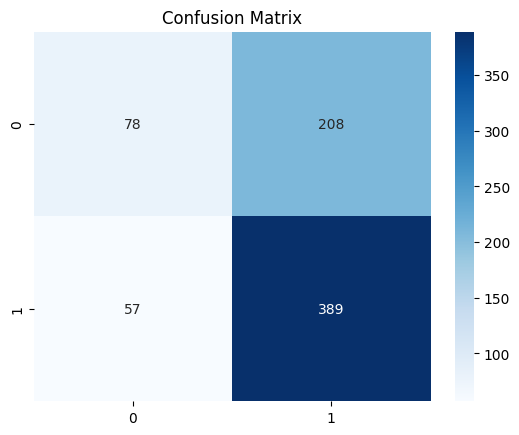

In [ ]:
sn.heatmap(confusion_matrix(y_test_wisc_base, predictions_nb_wisc_base), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print("Class Distribution in Original DataFrame:")
print(wisc_base['Firearm'].value_counts())

print("\nClass Distribution in Test Set:")
print(y_test_wisc_base.value_counts())

print("\nTotal Number of Instances in DataFrame:", len(wisc_base))
print("Number of Instances in Test Set:", len(y_test_wisc_base))


Class Distribution in Original DataFrame:
1    2273
0    1384
Name: Firearm, dtype: int64

Class Distribution in Test Set:
1    446
0    286
Name: Firearm, dtype: int64

Total Number of Instances in DataFrame: 3657
Number of Instances in Test Set: 732


# Saving the training and testing sets


In [ ]:
X_train_wisc_base.to_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/X_train_wisc_base.csv', index=False)
y_train_wisc_base.to_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/y_train_wisc_base.csv', index=False)

In [ ]:
X_test_wisc_base.to_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/X_test_wisc_base.csv', index=False)
y_test_wisc_base.to_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/y_test_wisc_base.csv', index=False)


In [ ]:
# Load the previously saved training data
X_train_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/X_train_wisc_base.csv', header=None, squeeze=True)
y_train_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/y_train_wisc_base.csv', header=None, squeeze=True)

# Check the shapes
print("Shape of X_train_wisc_base:", X_train_wisc_base.shape)
print("Shape of y_train_wisc_base:", y_train_wisc_base.shape)

# flattening the target variable
y_train_wisc_base = y_train_wisc_base.values.flatten()

# Double-check the shape after flattening
print("Shape of flattened y_train_wisc_base:", y_train_wisc_base.shape)

# Make sure the number of labels matches the number of samples
if X_train_wisc_base.shape[0] != y_train_wisc_base.shape[0]:
    print("Error: Number of samples in X_train and y_train do not match!")
else:
    print("Shapes are consistent. Ready for training.")


Shape of X_train_wisc_base: (2926, 105)
Shape of y_train_wisc_base: (2926,)
Shape of flattened y_train_wisc_base: (2926,)
Shapes are consistent. Ready for training.


<ipython-input-49-a8753ed1260b>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/X_train_wisc_base.csv', header=None, squeeze=True)
<ipython-input-49-a8753ed1260b>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/y_train_wisc_base.csv', header=None, squeeze=True)


In [ ]:
print("Shape of X_train_wisc_base:", X_train_wisc_base.shape)
print("Shape of y_train_wisc_base:", y_train_wisc_base.shape)


Shape of X_train_wisc_base: (2926, 105)
Shape of y_train_wisc_base: (2926,)


## Prediction 'Firearm' (decision tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the training data
X_train_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/X_train_wisc_base.csv')
y_train_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/y_train_wisc_base.csv')

# Load the testing data
X_test_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/X_test_wisc_base.csv')
y_test_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/y_test_wisc_base.csv')

# Drop or encode categorical columns
X_train_wisc_base = pd.get_dummies(X_train_wisc_base)
X_test_wisc_base = pd.get_dummies(X_test_wisc_base)

# Initialize and fit the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3, max_leaf_nodes=10) # fiddle with the tree characterics
decision_tree.fit(X_train_wisc_base, y_train_wisc_base)

# Predict 'Firearm' based on the features
predictions_dt = decision_tree.predict(X_test_wisc_base)

# Calculate and print accuracy
accuracy_dt = accuracy_score(y_test_wisc_base, predictions_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_wisc_base, predictions_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test_wisc_base, predictions_dt))


Decision Tree Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59       286
           1       0.73      0.87      0.80       446

    accuracy                           0.73       732
   macro avg       0.73      0.69      0.70       732
weighted avg       0.73      0.73      0.72       732

Confusion Matrix:
[[144 142]
 [ 56 390]]


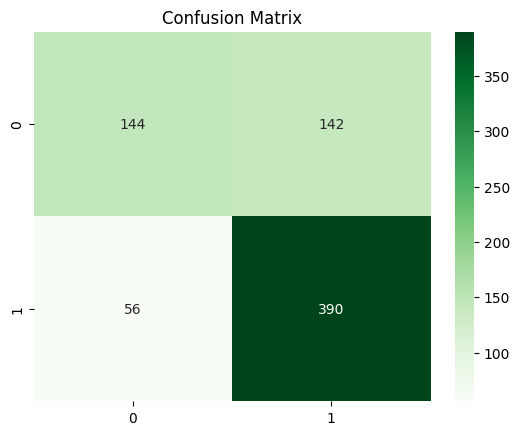

In [ ]:
sn.heatmap(confusion_matrix(y_test_wisc_base, predictions_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

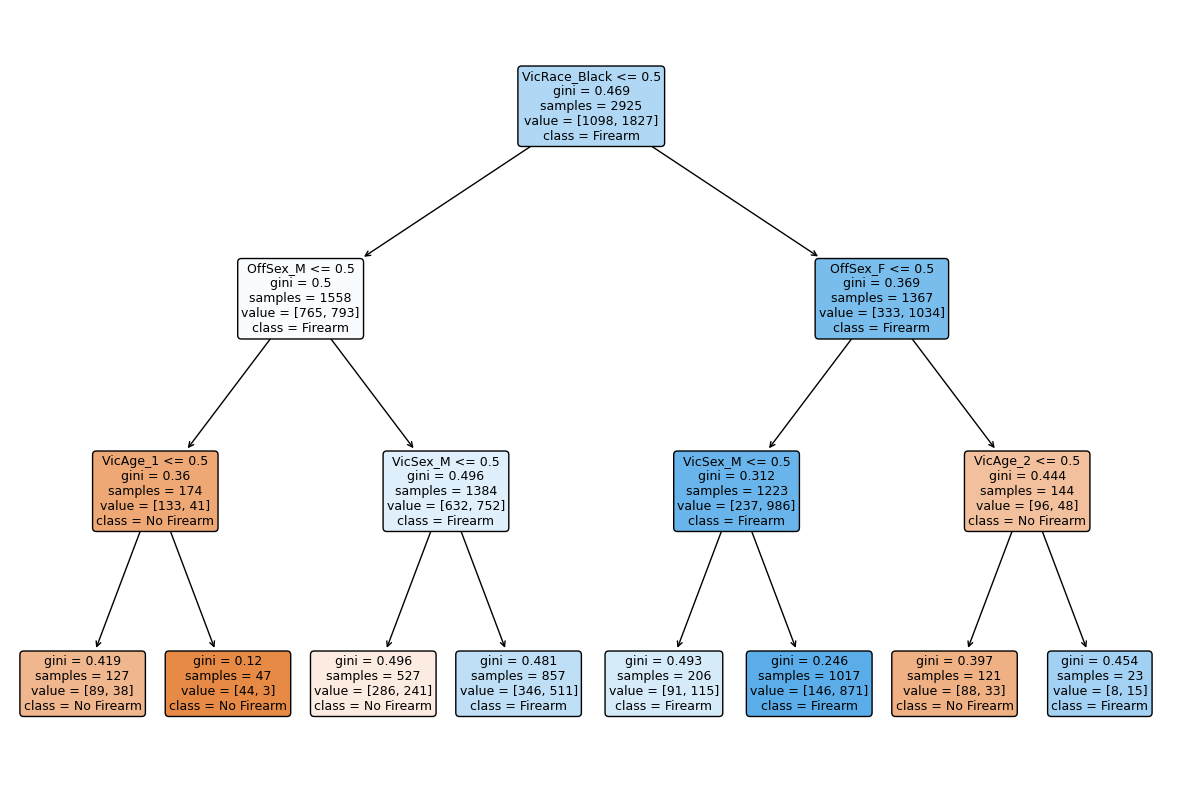

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=X_train_wisc_base.columns, class_names=['No Firearm', 'Firearm'], filled=True, rounded=True)
plt.show()


## Model 2 (predictions_dt2)

In [ ]:
# Load the training data
X_train_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/X_train_wisc_base.csv')
y_train_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/y_train_wisc_base.csv')

# Load the testing data
X_test_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/X_test_wisc_base.csv')
y_test_wisc_base = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/y_test_wisc_base.csv')

# Drop or encode categorical columns
X_train_wisc_base = pd.get_dummies(X_train_wisc_base)
X_test_wisc_base = pd.get_dummies(X_test_wisc_base)

# Initialize and fit the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3, max_leaf_nodes=20) # fiddle with the tree characterics
decision_tree.fit(X_train_wisc_base, y_train_wisc_base)

# Predict 'Firearm' based on the features
predictions_dt2 = decision_tree.predict(X_test_wisc_base)

# Calculate and print accuracy
accuracy_dt2 = accuracy_score(y_test_wisc_base, predictions_dt2)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_wisc_base, predictions_dt2))

print("Confusion Matrix:")
print(confusion_matrix(y_test_wisc_base, predictions_dt2))


Decision Tree Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59       286
           1       0.73      0.87      0.80       446

    accuracy                           0.73       732
   macro avg       0.73      0.69      0.70       732
weighted avg       0.73      0.73      0.72       732

Confusion Matrix:
[[144 142]
 [ 56 390]]


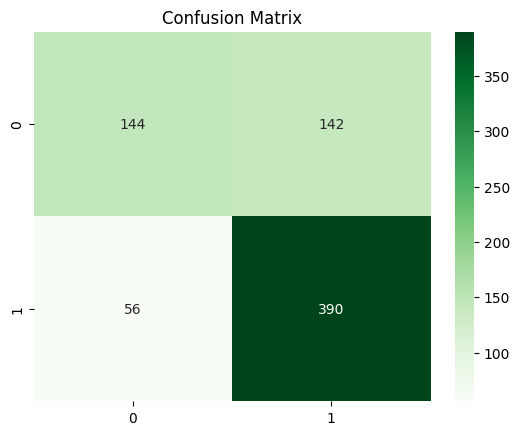

In [ ]:
sn.heatmap(confusion_matrix(y_test_wisc_base, predictions_dt2), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define features and target variable
X = wisc_base[['County_encoded', 'Year', 'Month', 'VicAge', 'VicSex_encoded', 'OffAge', 'OffSex_encoded']]  # Features
y = wisc_base['Firearm']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict 'Firearm' based on the features
predictions_logreg = logreg.predict(X_test)

# Calculate and print accuracy
accuracy_logreg = accuracy_score(y_test, predictions_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")


Logistic Regression Accuracy: 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


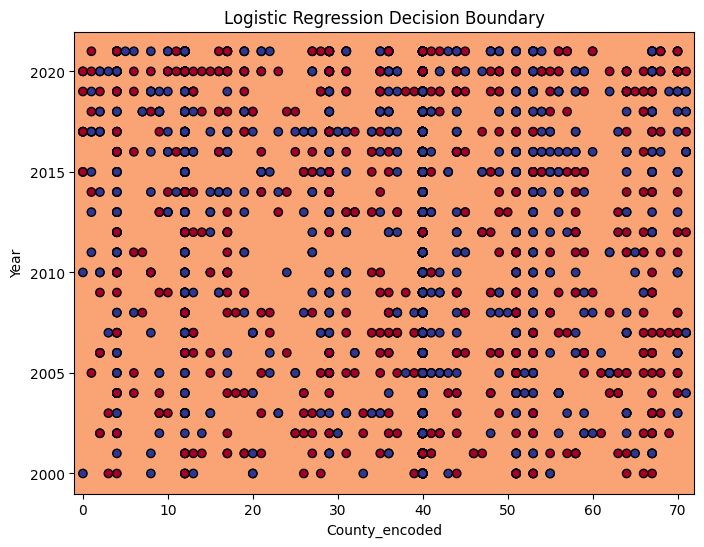

In [ ]:
# Considering only two features for visualization purposes
# Change these features to match the ones you want to visualize
feature1 = 'County_encoded'
feature2 = 'Year'

# Select only two features for visualization
X_visual = X_train[[feature1, feature2]]

# Train the logistic regression model using only two features
logreg.fit(X_visual, y_train)

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_visual[feature1].min() - 1, X_visual[feature1].max() + 1
y_min, y_max = X_visual[feature2].min() - 1, X_visual[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

# Plot the training points
plt.scatter(X_visual[feature1], X_visual[feature2], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Logistic Regression Decision Boundary")

plt.show()


## Comparing the models

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracy_logreg = accuracy_score(y_test, predictions_logreg)
accuracy_nb = accuracy_score(y_test, predictions_nb)
accuracy_model3 = accuracy_score(y_test, predictions_model3)

# Compare model accuracies
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print(f"Decision Tree Accuracy: {accuracy_model3:.2f}")

# Compare the models
best_model = max(accuracy_logreg, accuracy_nb, accuracy_model3)
if best_model == accuracy_logreg:
    print("Logistic Regression performs the best.")
elif best_model == accuracy_nb:
    print("Naive Bayes performs the best.")
else:
    print("Decision Tree performs the best.")


Logistic Regression Accuracy: 0.73
Naive Bayes Accuracy: 0.75
Decision Tree Accuracy: 0.76
Decision Tree performs the best.


  ## Clustering similar homicide incidents based on various attributes to identify patterns within the data.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


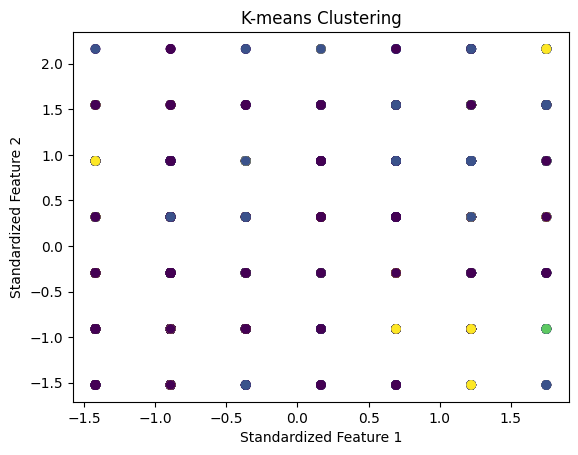

In [ ]:
# Selecting relevant columns for clustering
columns_for_clustering = ['VicAge', 'VicSex', 'VicRace', 'OffAge', 'OffSex', 'OffRace']

# Extracting the selected columns
wisc_base_cluster = wisc_base[columns_for_clustering]

# One-hot encoding for categorical variables
wisc_base_cluster = pd.get_dummies(wisc_base_cluster, columns=['VicSex', 'VicRace', 'OffSex', 'OffRace'])

# Standardizing the data
scaler = StandardScaler()
wisc_base_cluster_scaled = scaler.fit_transform(wisc_base_cluster)

# n_clusters
kmeans = KMeans(n_clusters=5, random_state=50)
wisc_base['Cluster'] = kmeans.fit_predict(wisc_base_cluster_scaled)

# Visualizing the clusters (scatter plot for two features)
plt.scatter(wisc_base_cluster_scaled[:, 0], wisc_base_cluster_scaled[:, 1], c=wisc_base['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(wisc_base_cluster_scaled, wisc_base['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.35


In [ ]:
# Consider the columns for clustering
columns_for_clustering = ['County', 'Year', 'Month', 'VicAge', 'OffAge']

# Select the data
data_for_clustering = wisc_base[columns_for_clustering]

# One-hot encode categorical variables if necessary
encoded_data = pd.get_dummies(data_for_clustering)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Initialize K-Means with a certain number of clusters
kmeans = KMeans(n_clusters=3)  # number of clusters

# Fit K-Means to the scaled data
kmeans.fit(scaled_data)

# Get the cluster labels
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


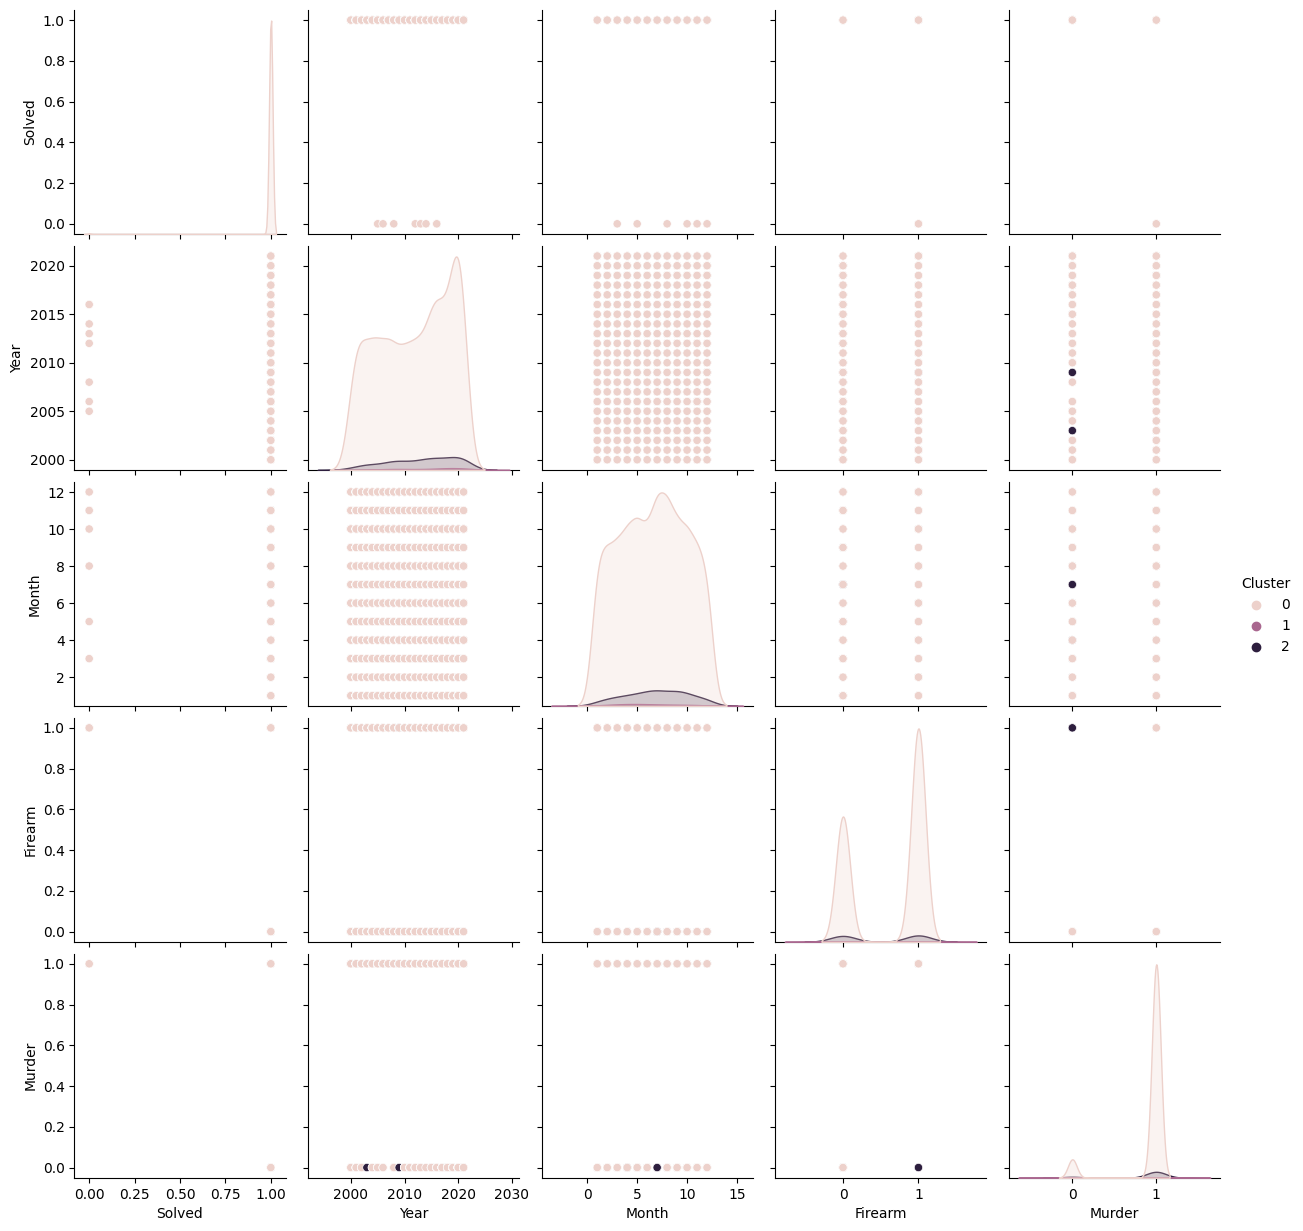

In [ ]:
sn.pairplot(wisc_base, hue='Cluster')
plt.show()

## NLP

Natural Language Processing (NLP):
    Text Analysis from Categorical Columns:
    Analyzing 'Weapon', 'Relationship'

Using 'wisc' df

In [ ]:
# Load the CSV file
wisc = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/wisc.csv')

Handgun - pistol, revolver, etc         1998
Firearm, type not stated                 853
Knife or cutting instrument              486
Other or type unknown                    392
Personal weapons, includes beating       302
Rifle                                    176
Blunt object - hammer, club, etc         131
Shotgun                                  117
Narcotics or drugs, sleeping pills       110
Asphyxiation - includes death by gas      97
Name: Weapon, dtype: int64


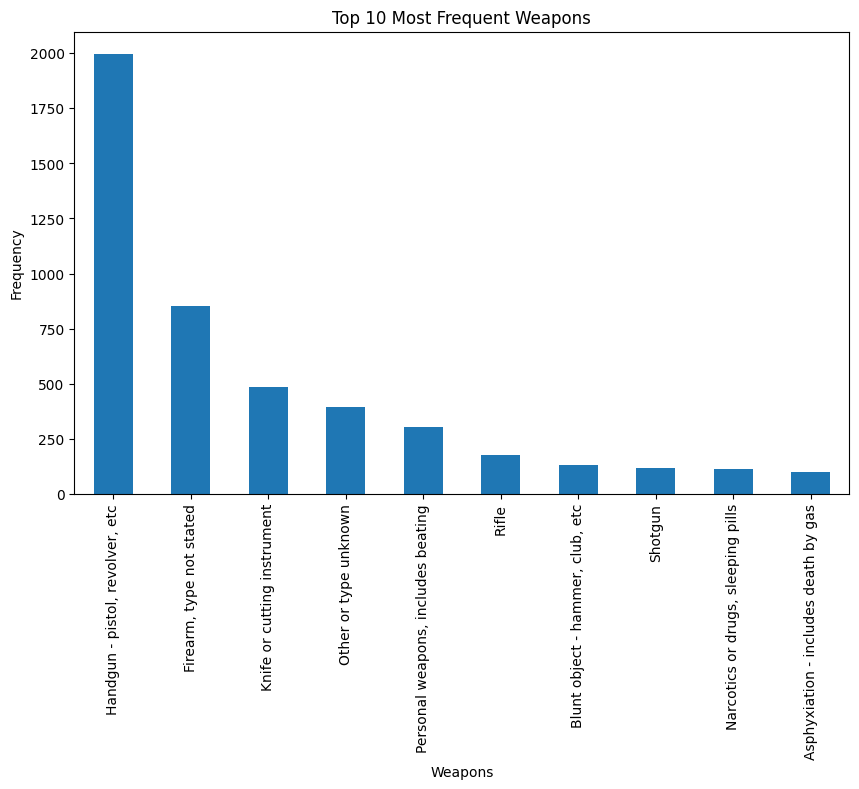

In [ ]:
weapon_frequency = wisc['Weapon'].value_counts()

# Display the top 10 most frequent weapons
top_10_weapons = weapon_frequency.head(10)
print(top_10_weapons)

# Plotting a bar chart for weapons
top_10_weapons.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Frequent Weapons')
plt.xlabel('Weapons')
plt.ylabel('Frequency')
plt.show()


Relationship not determined    1845
Stranger                        769
Acquaintance                    639
Other - known to victim         318
Friend                          191
Girlfriend                      175
Wife                            139
Son                             131
Other family                     90
Daughter                         86
Name: Relationship, dtype: int64


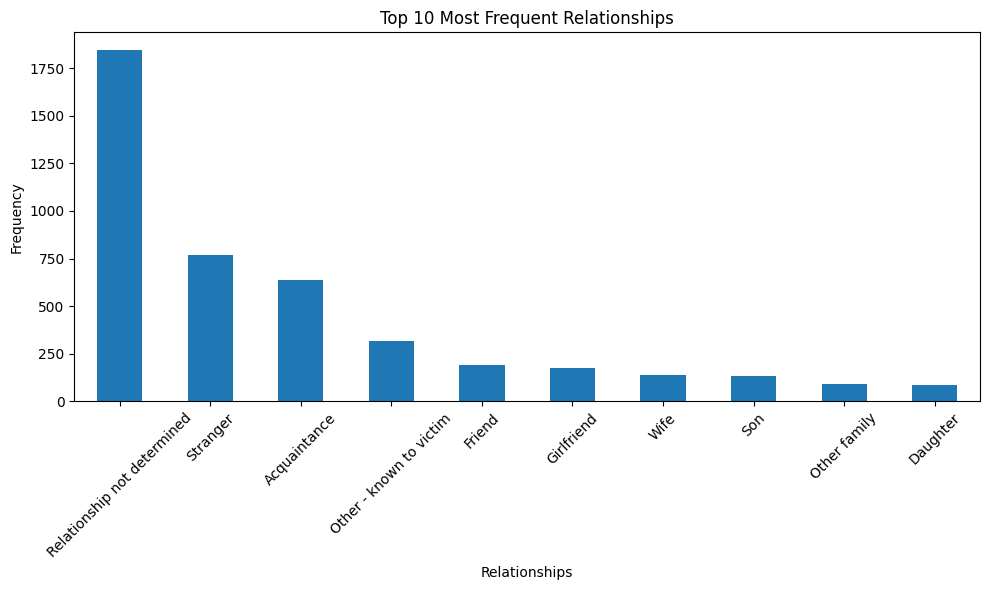

In [ ]:
relationship_frequency = wisc['Relationship'].value_counts()

# Display the top 10 most frequent relationships
top_10_relationships = relationship_frequency.head(10)
print(top_10_relationships)

# Plotting a bar chart for relationships with rotated x-labels
top_10_relationships.plot(kind='bar', figsize=(10, 6)
                         ).set_xticklabels(top_10_relationships.index, rotation=45)
plt.title('Top 10 Most Frequent Relationships')
plt.xlabel('Relationships')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
# Sentiment Analysis
from textblob import TextBlob

sentiments = wisc['Weapon'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
wisc['Sentiment'] = sentiments

# Check the sentiments for each text
print(wisc[['Weapon', 'Sentiment']])


                                  Weapon  Sentiment
480763   Handgun - pistol, revolver, etc     0.0000
480764             Other or type unknown    -0.1125
480765       Knife or cutting instrument    -0.6000
480766   Handgun - pistol, revolver, etc     0.0000
480910   Handgun - pistol, revolver, etc     0.0000
...                                  ...        ...
847720             Other or type unknown    -0.1125
847728          Firearm, type not stated     0.0000
847736  Blunt object - hammer, club, etc     0.0000
847745          Firearm, type not stated     0.0000
847754          Firearm, type not stated     0.0000

[4728 rows x 2 columns]


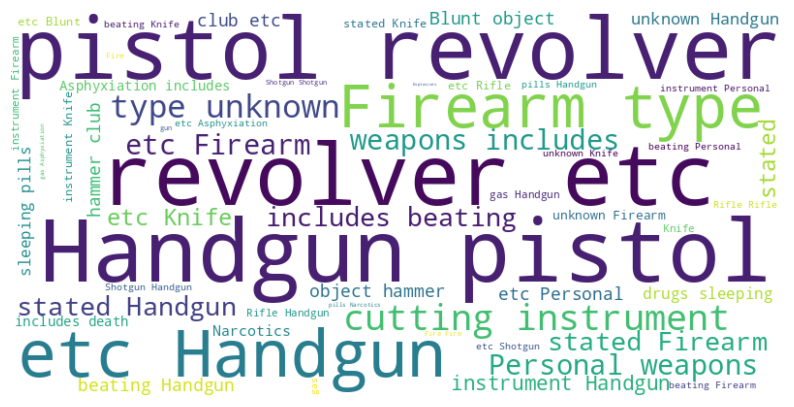

In [ ]:
from wordcloud import WordCloud
# Wordcloud
text_combined = ' '.join(wisc['Weapon'])  # Combine all texts into a single string

wordcloud = WordCloud(width = 800, height = 400, random_state=42, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Need some extra pre processing for 'Relationship'

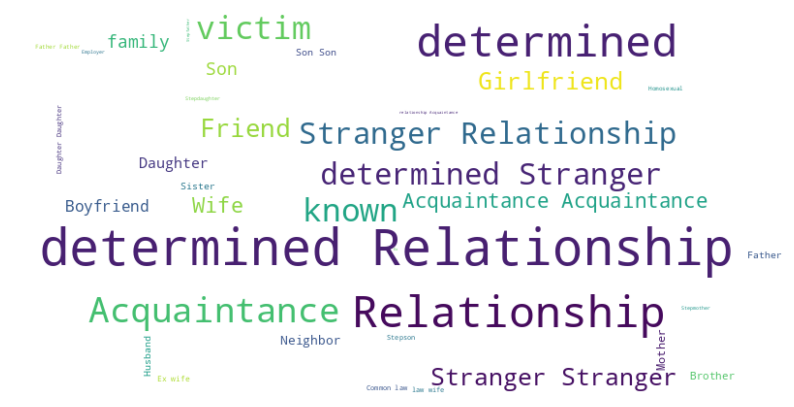

In [ ]:
text_combined = ' '.join(wisc['Relationship'])  # Combine all texts into a single string

wordcloud = WordCloud(width = 800, height = 400, random_state=42, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()